In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
import tensorflow as tf


np.random.seed(42)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

import seaborn as sns
from sklearn import metrics

## Data Preprocessing

In [2]:
df = pd.read_csv('heart_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [3]:
df.head(5)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Drop unnecessary columns
heart_df = df.drop(columns=['index', 'id'])

<Axes: >

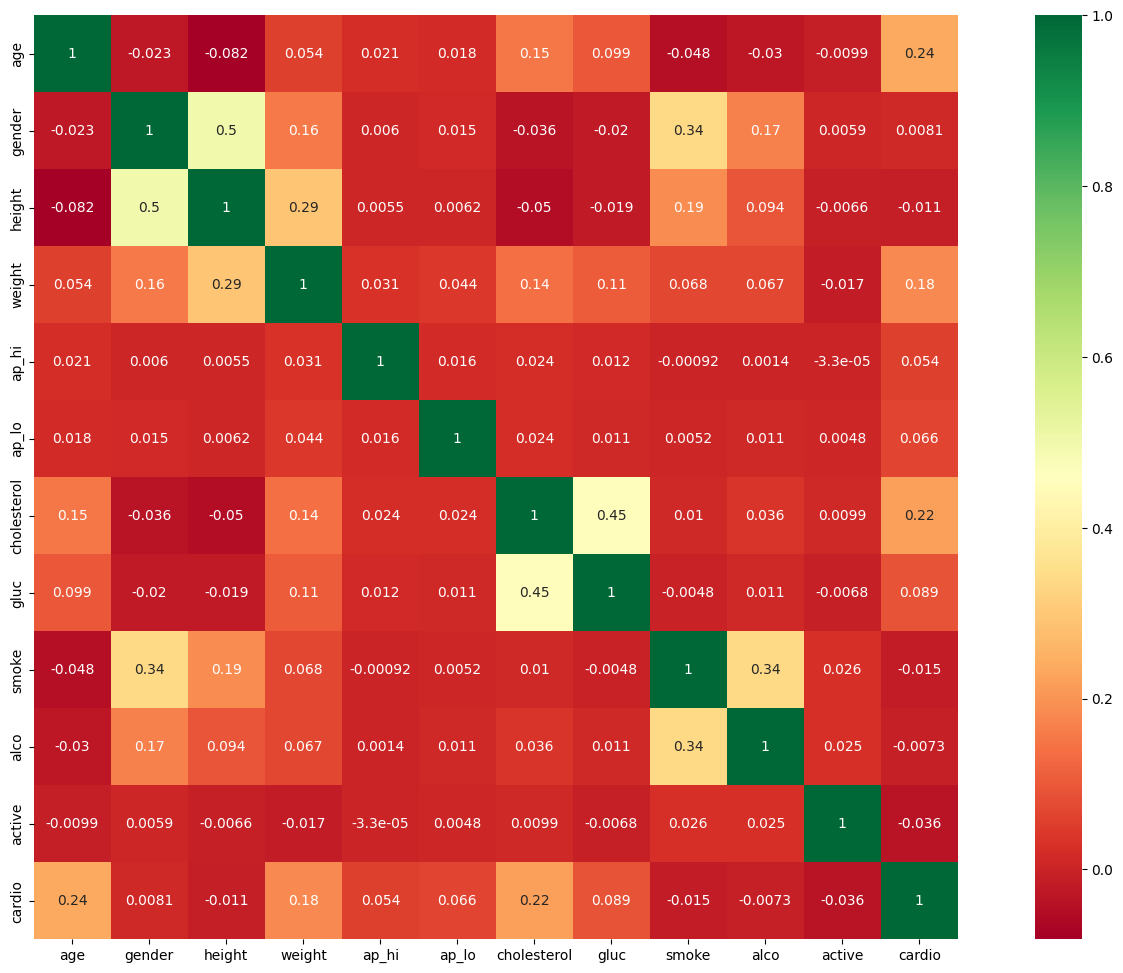

In [5]:
plt.figure(figsize = (20, 12))
sns.heatmap(heart_df.corr(), annot = True, cmap="RdYlGn", square = True)

In [6]:
# Check if any null values exist
heart_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
heart_df.shape

(70000, 12)

In [8]:
# check if dataset is balanced or not
heart_df['cardio'].value_counts()

# Note: our dataset can be seem as balanced dataset

0    35021
1    34979
Name: cardio, dtype: int64

In [9]:
#Extract the first 10000 rows
heart_data = heart_df.iloc[:10001]

In [10]:
# Preprocess data and split train and test dataset
X = heart_data.drop(['cardio'], axis=1)
y = heart_data.loc[:, ['cardio']]
print("Before split: ", X.shape, y.shape)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("After split: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Before split:  (10001, 11) (10001, 1)
After split:  (7000, 11) (3001, 11) (7000, 1) (3001, 1)


In [11]:
# normalize data using standardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Support Vector Classifier (SVC)

In [12]:
# documentation: 
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
mySVC = SVC(max_iter=10000)

In [13]:
print("\n---------- SVC ----------\n")
## time
start = time.time()
mySVC.fit(X_train, y_train)
svcTime = time.time() - start
print("Training time: ", svcTime)

## evaluate performance
y_predict_SVC = mySVC.predict(X_test)

recall = recall_score(y_test, y_predict_SVC)
precision = precision_score(y_test, y_predict_SVC)
f1 = f1_score(y_test, y_predict_SVC)
auroc = roc_auc_score(y_test, y_predict_SVC)

print("Recall: {0}\nPrecision: {1}\nF1: {2}\nAUROC: {3}".format(recall, precision, f1, auroc))



---------- SVC ----------

Training time:  4.844882011413574
Recall: 0.6625647668393783
Precision: 0.7773556231003039
F1: 0.7153846153846154
AUROC: 0.7307333099811167


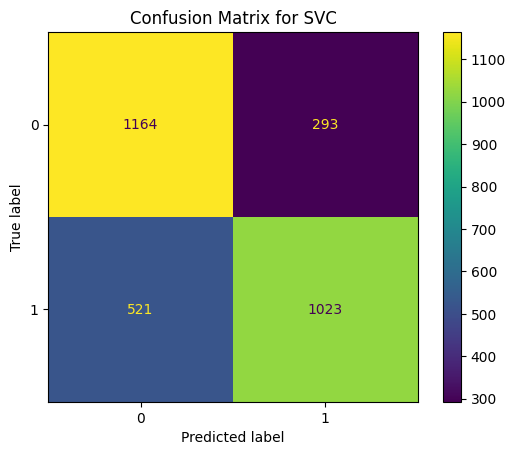

In [14]:
## Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_test, y_predict_SVC)
display_cm.ax_.set_title("Confusion Matrix for SVC")

plt.show()

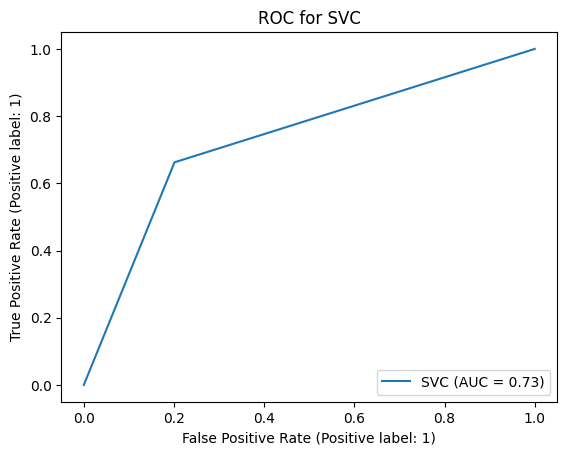

In [15]:
## Display ROC curve
display_roc = RocCurveDisplay.from_predictions(y_test, y_predict_SVC, name='SVC')
display_roc.ax_.set_title("ROC for SVC")

plt.show()

## Random Forest

In [16]:
# documentation: 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

myRandomForest = RandomForestClassifier(n_estimators=10, random_state=42)

In [17]:
print("\n---------- Random Forest ----------\n")
## time
start = time.time()
myRandomForest.fit(X_train, y_train)
randomForestTime = time.time() - start
print("Training time: ", randomForestTime)

## evaluate performance
y_predict_rf = myRandomForest.predict(X_test)

recall = recall_score(y_test, y_predict_rf)
precision = precision_score(y_test, y_predict_rf)
f1 = f1_score(y_test, y_predict_rf)
auroc = roc_auc_score(y_test, y_predict_rf)

print("Recall: {0}\nprecision: {1}\nf1: {2}\nAUROC: {3}".format(recall, precision, f1, auroc))



---------- Random Forest ----------

Training time:  0.3962266445159912
Recall: 0.647020725388601
precision: 0.7505634861006761
f1: 0.6949565217391304
AUROC: 0.7095776241905256


Text(0, 0.5, 'Features')

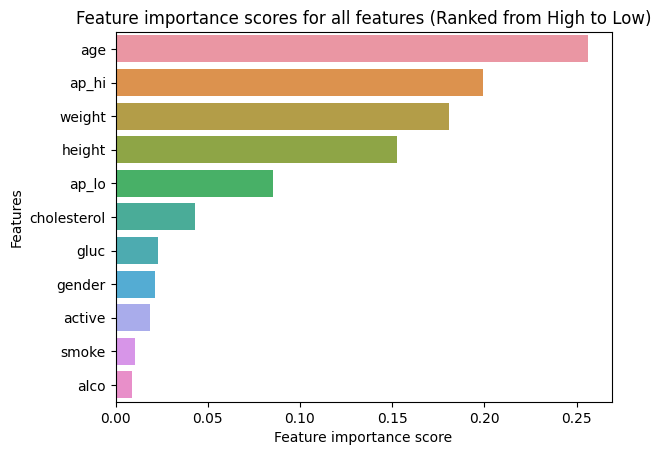

In [18]:
##Feature Importance scores display
feature_names = X.columns
importance_score = myRandomForest.feature_importances_
feature_scores = pd.Series(importance_score, index=feature_names).sort_values(ascending=False)

f, ax = plt.subplots()
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Feature importance scores for all features (Ranked from High to Low)")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")

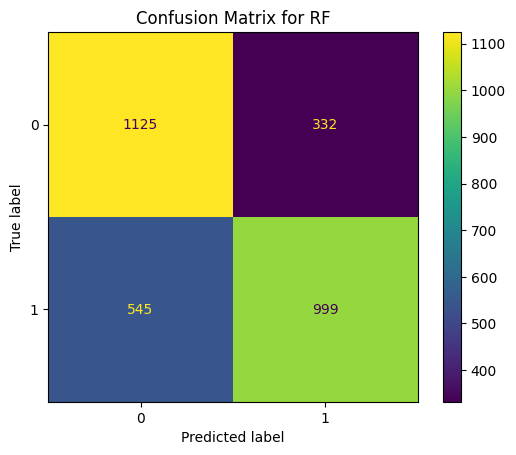

In [19]:
## Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_test, y_predict_rf)
display_cm.ax_.set_title("Confusion Matrix for RF")

plt.show()

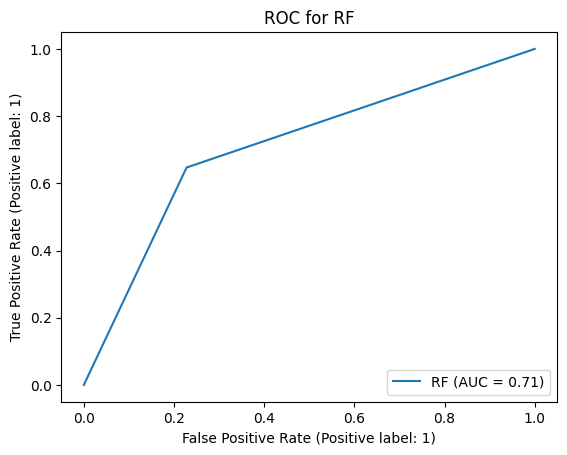

In [20]:
## Display ROC curve
display_roc = RocCurveDisplay.from_predictions(y_test, y_predict_rf, name='RF')
display_roc.ax_.set_title("ROC for RF")

plt.show()


## MLP

In [21]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]

In [22]:
#MLP

def mlp_model():
  model = Sequential()
  model.add(Dense(100, input_shape=(input_size,), activation='relu'))
  model.add(Dense(output_size, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model


mlpclf = KerasClassifier(build_fn=mlp_model, epochs=30, batch_size=64, verbose=0)

In [23]:
print("\n---------- MLP Classifier ----------\n")
## time
start = time.time()
mlpclf.fit(X_train, y_train)
mlpTime = time.time() - start
print("Training time: ", mlpTime)

## evaluate performance
y_predict_mlp = mlpclf.predict(X_test)

recall = recall_score(y_test, y_predict_mlp)
precision = precision_score(y_test, y_predict_mlp)
f1 = f1_score(y_test, y_predict_mlp)
auroc = roc_auc_score(y_test, y_predict_mlp)

print("Recall: {0}\nprecision: {1}\nf1: {2}\nAUROC: {3}".format(recall, precision, f1, auroc))



---------- MLP Classifier ----------

Training time:  23.0191969871521
94/94 [==============================] - 0s 2ms/step
Recall: 0.6664507772020726
precision: 0.7760180995475113
f1: 0.7170731707317074
AUROC: 0.7313036315660328


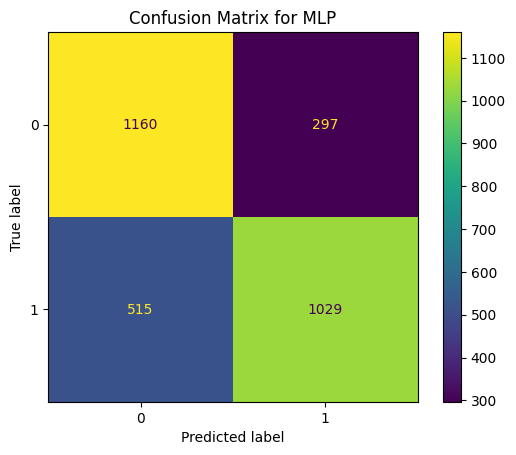

In [24]:
## Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_test, y_predict_mlp)
display_cm.ax_.set_title("Confusion Matrix for MLP")

plt.show()

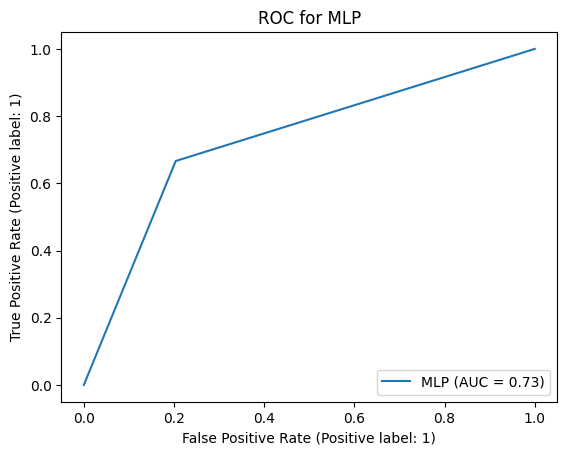

In [25]:
## Display ROC curve
display_roc = RocCurveDisplay.from_predictions(y_test, y_predict_mlp, name='MLP')
display_roc.ax_.set_title("ROC for MLP")

plt.show()

## Stacked generalization

In [26]:
#Stacking pre-trained base models
base_estimators = [
    ('svc', mySVC),
    ('rf', myRandomForest),
    ('mlp', mlpclf)
]

final_estimator = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator, cv=3, verbose=0)

In [27]:
print("\n---------- Stacking Classifier ----------\n")
## time
start = time.time()
stacking_clf.fit(X_train, y_train)
stackingTime = time.time() - start
print("Training time: ", stackingTime)

## evaluate performance
y_predict_stacking = stacking_clf.predict(X_test)

recall = recall_score(y_test, y_predict_stacking)
precision = precision_score(y_test, y_predict_stacking)
f1 = f1_score(y_test, y_predict_stacking)
auroc = roc_auc_score(y_test, y_predict_stacking)

print("Recall: {0}\nPrecision: {1}\nF1: {2}\nAUROC: {3}".format(recall, precision, f1, auroc))



---------- Stacking Classifier ----------

73/73 [==============================] - 0s 1ms/step
Training time:  29.482252836227417
94/94 [==============================] - 0s 1ms/step
Recall: 0.6884715025906736
Precision: 0.7675090252707581
F1: 0.7258449982929327
AUROC: 0.7337347217826394


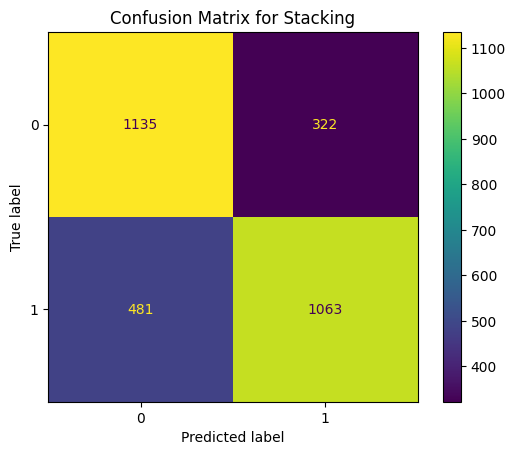

In [28]:
## Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_test, y_predict_stacking)
display_cm.ax_.set_title("Confusion Matrix for Stacking")

plt.show()

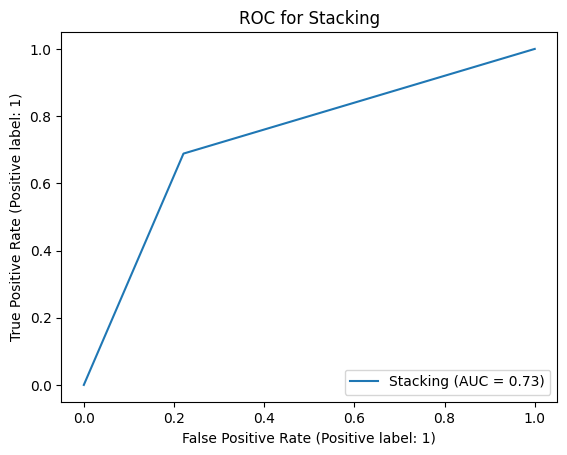

In [29]:
## Display ROC curve
display_roc = RocCurveDisplay.from_predictions(y_test, y_predict_stacking, name='Stacking')
display_roc.ax_.set_title("ROC for Stacking")

plt.show()

## Tuning

### Tuning SVC

In [30]:
# we are going to tune: kernel, regularization parameter C
param_grid = {
    'C': [0.01, 0.1, 1, 10], 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc_base = SVC(max_iter=10000, random_state=42)

SVC_grid = GridSearchCV(svc_base, param_grid, cv=3, scoring='accuracy')

SVC_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(max_iter=10000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [31]:
print("Best parameters: {}".format(SVC_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(SVC_grid.best_score_))

Best parameters: {'C': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.72


In [32]:
# build the model with best parameters
svc_tuned = SVC(
    C=SVC_grid.best_params_['C'], 
    kernel=SVC_grid.best_params_['kernel'],
    max_iter=10000, random_state=42)

svc_tuned.fit(X_train, y_train)

SVC(C=1, max_iter=10000, random_state=42)

In [33]:
## evaluate performance
y_predict_SVC = svc_tuned.predict(X_test)

recall = recall_score(y_test, y_predict_SVC)
precision = precision_score(y_test, y_predict_SVC)
f1 = f1_score(y_test, y_predict_SVC)
auroc = roc_auc_score(y_test, y_predict_SVC)

print("Recall: {0}\nPrecision: {1}\nF1: {2}\nAUROC: {3}".format(recall, precision, f1, auroc))

Recall: 0.6625647668393783
Precision: 0.7773556231003039
F1: 0.7153846153846154
AUROC: 0.7307333099811167


### Tuning Random Forest

In [34]:
# we are going to tune _estimators, max_depth, criterion
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [15,20,30,50],
    'criterion': ['gini', 'entropy']
}


rf_base = RandomForestClassifier(random_state=42)

RF_grid = GridSearchCV(rf_base, param_grid, cv=3, scoring='accuracy')

RF_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 30, 50],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='accuracy')

In [35]:
print("Best parameters: {}".format(RF_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(RF_grid.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}
Best cross-validation score: 0.73


In [36]:
# build the model with best parameters
RF_tuned = RandomForestClassifier(
    n_estimators=RF_grid.best_params_['n_estimators'], 
    max_depth=RF_grid.best_params_['max_depth'],
    criterion=RF_grid.best_params_['criterion'],
    random_state=42)

RF_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, random_state=42)

In [37]:
## evaluate performance
y_predict_RF = RF_tuned.predict(X_test)

recall = recall_score(y_test, y_predict_RF)
precision = precision_score(y_test, y_predict_RF)
f1 = f1_score(y_test, y_predict_RF)
auroc = roc_auc_score(y_test, y_predict_RF)

print("Recall: {0}\nPrecision: {1}\nF1: {2}\nAUROC: {3}".format(recall, precision, f1, auroc))

Recall: 0.6839378238341969
Precision: 0.7719298245614035
F1: 0.7252747252747253
AUROC: 0.7348995913954787


### Tuning MLP

In [38]:
def mlp_tune(hidden_neurons = 16, activation = 'relu', optimizer = 'sgd', learning_rate = 0.001):
  model = Sequential()
  model.add(Dense(hidden_neurons, input_shape=(input_size,), activation=activation))
  model.add(Dense(hidden_neurons, activation=activation))
  model.add(Dense(hidden_neurons, activation=activation))
  model.add(Dense(output_size, activation='sigmoid'))
  if(optimizer == 'sgd'):
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate))
  
  if(optimizer == 'adam'):
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
  
  return model

mlpclf = KerasClassifier(build_fn=mlp_tune, epochs=30, batch_size=64, verbose=0)

In [39]:
param_grid_mlp = {
    'hidden_neurons': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam','sgd'],
    'learning_rate': [0.01, 0.1]
}

grid_search_mlp = GridSearchCV(estimator = mlpclf, param_grid = param_grid_mlp, cv=3, scoring = 'accuracy')
grid_search_mlp.fit(X_train, y_train)

73/73 [==============================] - 0s 2ms/step


GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff9e635cc70>,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_neurons': [32, 64, 128],
                         'learning_rate': [0.01, 0.1],
                         'optimizer': ['adam', 'sgd']},
             scoring='accuracy')

In [40]:
print("Best parameters: {}".format(grid_search_mlp.best_params_))
print("Best cross-validation score: {}".format(grid_search_mlp.best_score_))

Best parameters: {'activation': 'tanh', 'hidden_neurons': 128, 'learning_rate': 0.01, 'optimizer': 'sgd'}
Best cross-validation score: 0.7238580906343213


In [41]:
# build the model with best parameters
hidden_neurons_best = grid_search_mlp.best_params_['hidden_neurons']
activation_best = grid_search_mlp.best_params_['activation']
optimizer_best = grid_search_mlp.best_params_['optimizer']
learning_rate_best = grid_search_mlp.best_params_['learning_rate']

MLP_tuned = KerasClassifier(build_fn=mlp_tune, hidden_neurons = hidden_neurons_best , activation = activation_best, 
                            optimizer = optimizer_best, learning_rate = learning_rate_best,
                            epochs=30, batch_size=64, verbose=0)


MLP_tuned.fit(X_train, y_train)

print(MLP_tuned.model.summary())

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_302 (Dense)           (None, 128)               1536      
                                                                 
 dense_303 (Dense)           (None, 128)               16512     
                                                                 
 dense_304 (Dense)           (None, 128)               16512     
                                                                 
 dense_305 (Dense)           (None, 1)                 129       
                                                                 
Total params: 34,689
Trainable params: 34,689
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
## evaluate performance
y_predict_MLP = MLP_tuned.predict(X_test)

recall = recall_score(y_test, y_predict_MLP)
precision = precision_score(y_test, y_predict_MLP)
f1 = f1_score(y_test, y_predict_MLP)
auroc = roc_auc_score(y_test, y_predict_MLP)

print("Recall: {0}\nPrecision: {1}\nF1: {2}\nAUROC: {3}".format(recall, precision, f1, auroc))

94/94 [==============================] - 0s 2ms/step
Recall: 0.6819948186528497
Precision: 0.772560528246515
F1: 0.7244582043343651
AUROC: 0.7346144306030207


## Stacking Tuned models

In [43]:
#Stacking pre-trained base models
base_estimators = [
    ('svc', svc_tuned),
    ('rf', RF_tuned),
    ('mlp', MLP_tuned)
]

final_estimator = LogisticRegression()

stacking_clf_tuned = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator, cv=3, verbose=0)

In [44]:
print("\n---------- Stacking Classifier ----------\n")
## time
start = time.time()
stacking_clf_tuned.fit(X_train, y_train)
stackingTime = time.time() - start
print("Training time: ", stackingTime)

## evaluate performance
y_predict_stacking_tuned = stacking_clf_tuned.predict(X_test)

recall = recall_score(y_test, y_predict_stacking_tuned)
precision = precision_score(y_test, y_predict_stacking_tuned)
f1 = f1_score(y_test, y_predict_stacking_tuned)
auroc = roc_auc_score(y_test, y_predict_stacking_tuned)

print("Recall: {0}\nPrecision: {1}\nF1: {2}\nAUROC: {3}".format(recall, precision, f1, auroc))



---------- Stacking Classifier ----------

73/73 [==============================] - 0s 1ms/step
Training time:  37.87780022621155
94/94 [==============================] - 0s 1ms/step
Recall: 0.6904145077720207
Precision: 0.7702312138728323
F1: 0.7281420765027322
AUROC: 0.7360789079697441


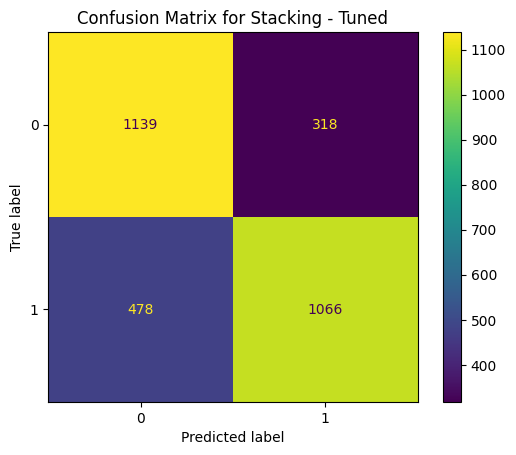

In [45]:
## Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_test, y_predict_stacking_tuned)
display_cm.ax_.set_title("Confusion Matrix for Stacking - Tuned")

plt.show()

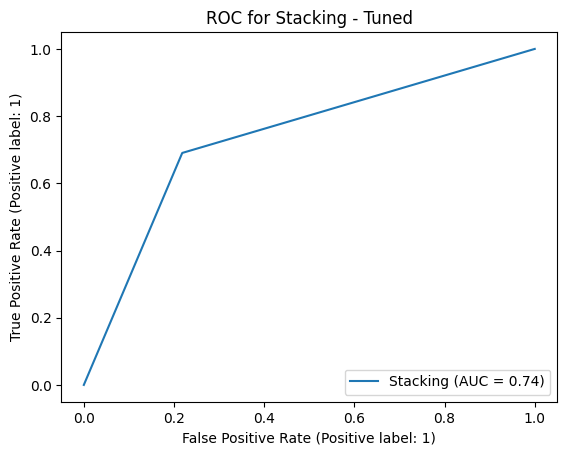

In [46]:
## Display ROC curve
display_roc = RocCurveDisplay.from_predictions(y_test, y_predict_stacking_tuned, name='Stacking')
display_roc.ax_.set_title("ROC for Stacking - Tuned")

plt.show()